# Visualization in Plotly

1. Metadata

    -- Veröffentlichungen pro Tag
    
    -- Moving Average der Veröffentlichungen
    
    -- Anzahl Artikel pro Topic (Topics von Utility Dive)
    
    -- Anzahl Art pro Kategorie (Selbstdefinierte Kategoriegruppen der Keywords)
    
    -- Authoren
    
2. Keywords
   
3. Deeper Textanalysis
    -- in eigenem Notebook

# Plotly Playground#

In [1]:
import plotly as py
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [2]:
init_notebook_mode(connected=True)

In [3]:
iplot([{"x":[1,2,3,4,5],"y":[1,2,6,4,1]}])

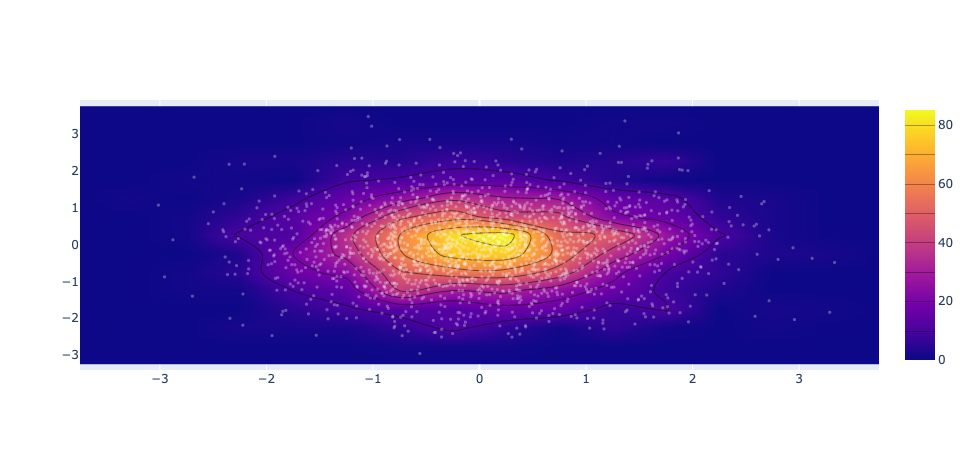

In [4]:
import plotly.graph_objs as go
import numpy as np
import pandas as pd

x = np.random.randn(2000)
y = np.random.randn(2000)

iplot([go.Histogram2dContour(x=x,y=y, contours =dict(coloring='heatmap')),
      go.Scatter(x=x,y=y, mode='markers', marker=dict(color='white', size=3, opacity=0.3))
      ], show_link=False)

In [5]:
N = 100
example_x = np.random.rand(N)
example_y = np.random.rand(N)

trace = go.Scatter(x= example_x,  y=example_y, mode='markers')

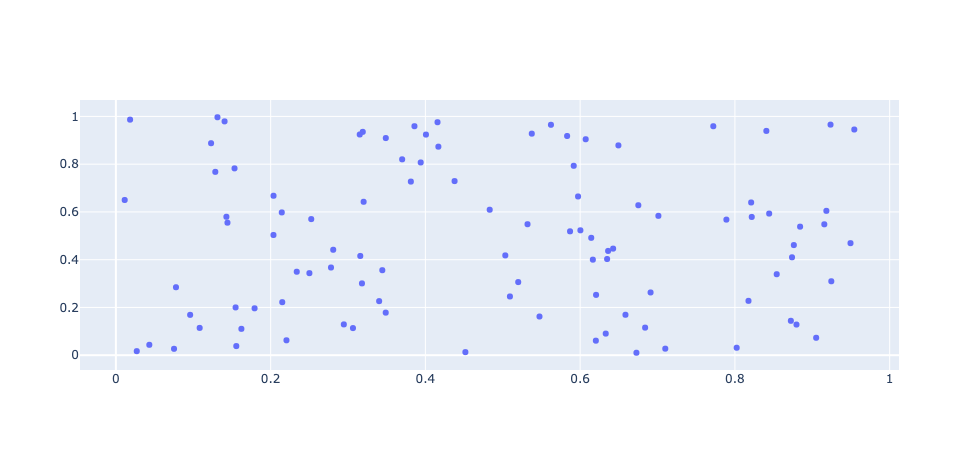

In [6]:
data = [trace]
iplot(data)

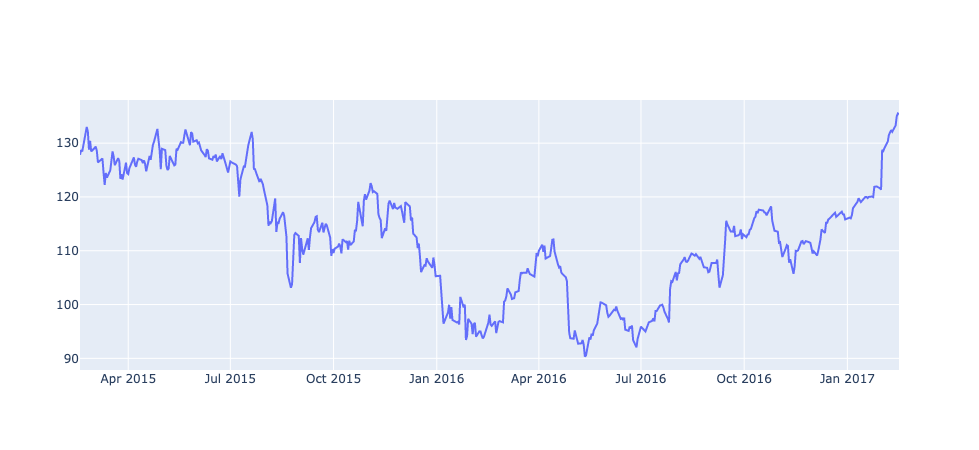

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv")

data = [go.Scatter(
    x=df.Date,
    y=df['AAPL.Close']
)]

iplot(data)

In [8]:
tesla = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/tesla-stock-price.csv")

trace1 = go.Scatter(
    x=tesla.date,
    y=tesla['high'],
    name='Tesla High Price',
    line = dict(color='#17BECF'),
    opacity = 0.8
)

trace2 = go.Scatter(
    x=tesla.date,
    y=tesla['low'],
    name='Tesla Low Price',
    line = dict(color='#7F7F7F'),
    opacity = 0.8
)

data=[trace1, trace2]

layout = dict(
    title='Tesla Stock Price: High vs. Low'
)

figure = dict(data=data, layout=layout)

iplot(figure)

# Start of Notebook

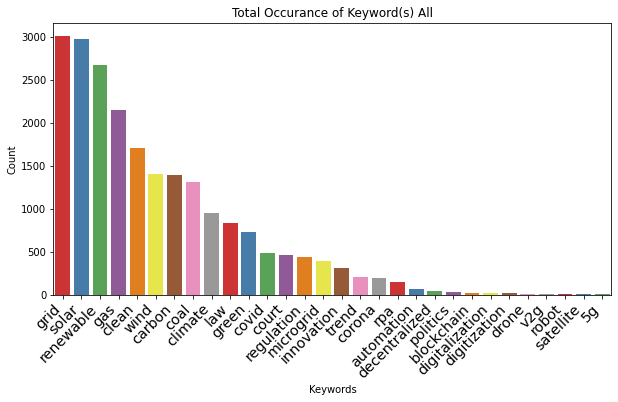

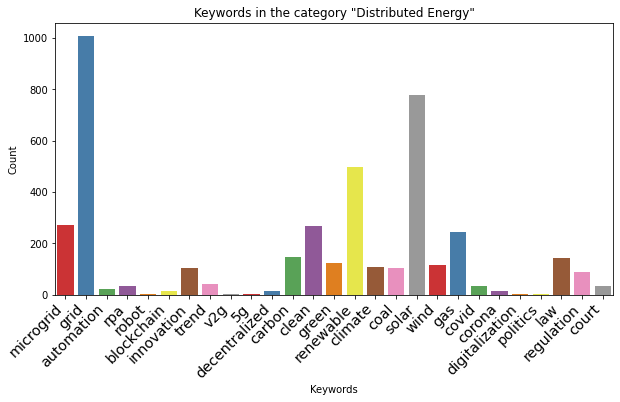

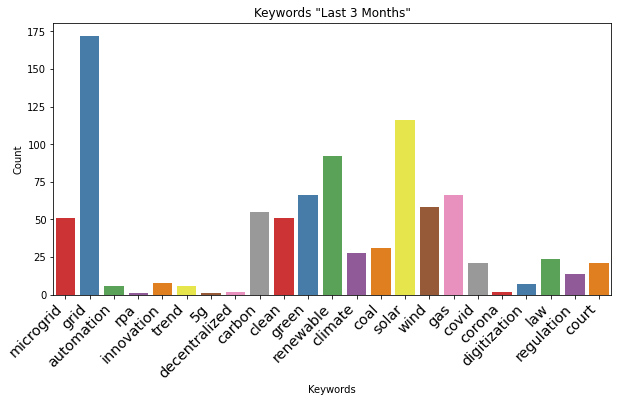

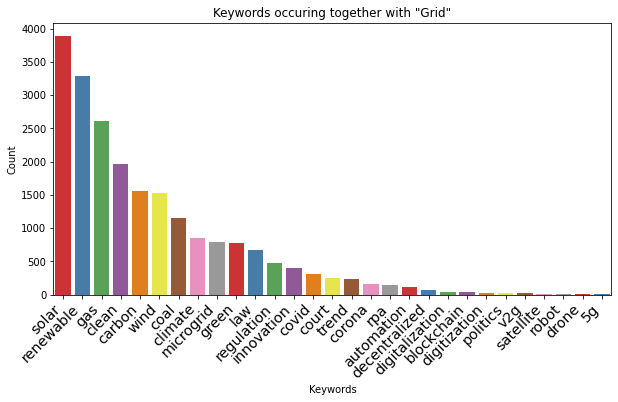

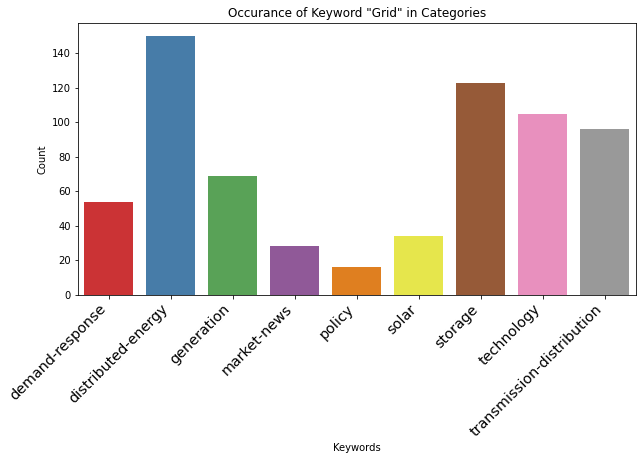

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
from ipynb.fs.full.SingleKeywords import keyword_plot, sum_columns, sort_keyword_frame, drop_empty_cols

In [10]:
all_keywords = pd.read_csv('../data/analysis/texts_allkeywords10_08.csv')
total = pd.read_csv('../data/analysis/keywords_all10_08.csv')
daten = pd.read_csv('../data/preprocessed/10_02PreProUDText.csv')
daten['Date']=pd.to_datetime(daten['Date'],format='%b %d %Y')
daten = daten.drop(columns={'Unnamed: 0'})
total.drop(columns={'Unnamed: 0'},inplace=True)
all_keywords.drop(columns={'Unnamed: 0'},inplace=True)
total.head()

grid   solar  renewable  microgrid     gas   clean    wind  carbon  \
0  3009.0  2970.0     2665.0     2259.0  2143.0  1702.0  1401.0  1386.0   

     coal  clean energy  ...  high frequency  predictive maintenance   v2g  \
0  1313.0        1266.0  ...            15.0                    12.0  11.0   

   drone  robot  satellite  iot data   5g  virtual reality  virtual assistant  
0   11.0   10.0        9.0       5.0  4.0              1.0                1.0  

[1 rows x 42 columns]

In [11]:
print(list(total.columns))

['grid', 'solar', 'renewable', 'microgrid', 'gas', 'clean', 'wind', 'carbon', 'coal', 'clean energy', 'climate', 'law', 'green', 'covid', 'court', 'regulation', 'new technology', 'climate change', 'innovation', 'vehicle to', 'trend', 'rpa', 'smart grid', 'smart meter', 'artificial intelligence', 'smart city', 'automation', 'decentralized', 'politics', 'blockchain', 'digitalization', 'digitization', 'high frequency', 'predictive maintenance', 'v2g', 'drone', 'robot', 'satellite', 'iot data', '5g', 'virtual reality', 'virtual assistant']


In [12]:
keyword_list = []
double_keyword_list = []
with open("../data/raw/keywords.txt","r") as file:
        keyword_list = list(file.readlines())   
        
with open("../data/raw/doublekeywords.txt","r") as file:
        double_keyword_list = list(file.readlines())   

keyword_list = keyword_list + double_keyword_list

In [13]:
# Removed ML and AI since they are not counted right
keyword_list = [word.rstrip() for word in keyword_list]
keyword_list = [word.lower() for word in keyword_list]

#Remove Duplications
keyword_list = list(dict.fromkeys(keyword_list))
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
keyword_list = [lemmatizer.lemmatize(word) for word in keyword_list]

In [14]:
topics = daten.Topic.unique()

In [15]:
topics_sum = pd.DataFrame(columns=topics)

In [16]:
for col in topics_sum.columns:
    topics_sum.at[0,col]= daten.Topic.str.count(col).sum()

In [17]:
topics_sum

transmission-distribution generation distributed-energy storage solar  \
0                       175        158                229     189    90   

  demand-response policy technology market-news  
0             175     44        185         145

# 1. Metadata
## 1.1. Topics

In [18]:
#colorscheme?

In [19]:
daten.head()

Title  \
0  propelling the transition digitization bolster...   
1  following outrage over hurricane isaias respon...   
2  propelling the transition new and better trans...   
3  pipeline infrastructure planning in the era of...   
4  propelling the transition green hydrogen could...   

                                                 URL            Author  \
0  https://www.utilitydive.com/news/propelling-th...         deep dive   
1  https://www.utilitydive.com/news/following-out...     robert walton   
2  https://www.utilitydive.com/news/propelling-th...     robert walton   
3  https://www.utilitydive.com/news/pipeline-infr...           opinion   
4  https://www.utilitydive.com/news/propelling-th...  herman k trabish   

                                          Teasertext  \
0  the continuing automation and digitization of ...   
1  the bipartisan legislation would alter rules t...   
2  new technologies can make it easier to develop...   
3  scrutiny of the siting of infrastructure proje...   
4  green hydrogen beats renewables plus batteries...   

                                            Fulltext  \
0  increasing digitization in the power sector is...   
1  a bipartisan group of connecticut lawmakers on...   
2  electric transmission lines — capable of carry...   
3  the following is a contributed article by emil...   
4  renewablesgenerated electricity and battery en...   

                       Topic      DiveBrief       Date  \
0  transmission-distribution  no dive brief 2020-08-21   
1  transmission-distribution  no dive brief 2020-08-20   
2  transmission-distribution  no dive brief 2020-08-19   
3  transmission-distribution  no dive brief 2020-08-18   
4  transmission-distribution  no dive brief 2020-08-17   

                                  FullTextWordTokens  \
0  ['increas', 'digit', 'power', 'sector', 'creat...   
1  ['bipartisan', 'group', 'connecticut', 'lawmak...   
2  ['electr', 'transmiss', 'line', '—', 'capabl',...   
3  ['follow', 'contribut', 'articl', 'emili', 'p'...   
4  ['renewablesgener', 'electr', 'batteri', 'ener...   

                                       FullTextLemma  
0  ['increasing', 'digitization', 'power', 'secto...  
1  ['bipartisan', 'group', 'connecticut', 'lawmak...  
2  ['electric', 'transmission', 'line', '—', 'cap...  
3  ['following', 'contributed', 'article', 'emily...  
4  ['renewablesgenerated', 'electricity', 'batter...

In [20]:
# ToDo: Fix color scheme
groups = topics
amount = topics_sum.loc[0]

trace = go.Pie(labels=groups, values = amount, hoverinfo='label+percent', textinfo='value', textfont=dict(size=20),
              marker=dict(line= dict(color='#000000', width=2)))

layout = dict(
    title='Articles per Category'
)

figure = dict(data=trace, layout=layout)
iplot(figure)

In [21]:
import plotly.express as px

In [22]:
topics_sum

transmission-distribution generation distributed-energy storage solar  \
0                       175        158                229     189    90   

  demand-response policy technology market-news  
0             175     44        185         145

In [23]:
groups

array(['transmission-distribution', 'generation', 'distributed-energy',
       'storage', 'solar', 'demand-response', 'policy', 'technology',
       'market-news'], dtype=object)

In [24]:
piechart = px.pie(topics_sum,
    names = topics_sum.columns,
    values = topics_sum.loc[0],
    hole=.3,
    color_discrete_sequence=px.colors.sequential.PuBu,
    title='Article per Category'
)
piechart.show()

## 1.2. Dates

In [25]:
dates = daten.groupby('Date').count()
dates.drop(columns={'URL','Teasertext','Fulltext','Topic','DiveBrief','Author','FullTextWordTokens','FullTextLemma'}, inplace=True)
dates = dates.rename(columns={'Title': 'Count'})
dates['Dates'] = dates.index

In [26]:
dat = [go.Scatter(
    x=dates.Dates,
    y=dates['Count'])]

layout = dict(
    title='Published Articles per Day',
)

figure = dict(data=dat, layout=layout)
iplot(figure)

In [27]:
dates['MovingAverage7'] = dates['Count'].rolling(7).mean()

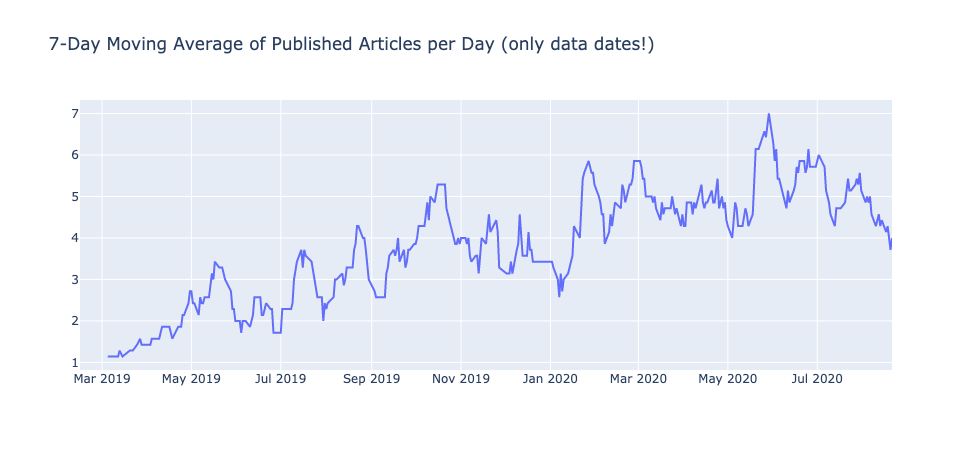

In [28]:
dat = [go.Scatter(
    x=dates.Dates,
    y=dates['MovingAverage7'])]

layout = dict(
    title='7-Day Moving Average of Published Articles per Day (only data dates!)'
)

figure = dict(data=dat, layout=layout)
iplot(figure)

In [29]:
dates['Count'].mean()

3.913544668587896

In [30]:
np.var(dates['Count'])

3.479557175958608

In [31]:
dates['Count'].max()

9

In [32]:
dates['MovingAverage7'].mean()

3.935483870967742

In [33]:
dates.tail()

Count      Dates  MovingAverage7
Date                                        
2020-08-17      4 2020-08-17        4.142857
2020-08-18      4 2020-08-18        4.285714
2020-08-19      3 2020-08-19        4.000000
2020-08-20      3 2020-08-20        3.714286
2020-08-21      6 2020-08-21        4.000000

In [34]:
dates.head()

Count      Dates  MovingAverage7
Date                                        
2019-02-14      1 2019-02-14             NaN
2019-02-21      1 2019-02-21             NaN
2019-02-25      1 2019-02-25             NaN
2019-02-27      2 2019-02-27             NaN
2019-02-28      1 2019-02-28             NaN

In [35]:
dates['Dates'].max()

Timestamp('2020-08-21 00:00:00')

### In the following the pulished articles are considered over the entire date range including dates where no articles has been published:

In [36]:
dates_fulldf = dates
dates_fulldf.reset_index(inplace=True, drop=True)
dates_fulldf

Count      Dates  MovingAverage7
0        1 2019-02-14             NaN
1        1 2019-02-21             NaN
2        1 2019-02-25             NaN
3        2 2019-02-27             NaN
4        1 2019-02-28             NaN
..     ...        ...             ...
342      4 2020-08-17        4.142857
343      4 2020-08-18        4.285714
344      3 2020-08-19        4.000000
345      3 2020-08-20        3.714286
346      6 2020-08-21        4.000000

[347 rows x 3 columns]

554 days 00:00:00
347


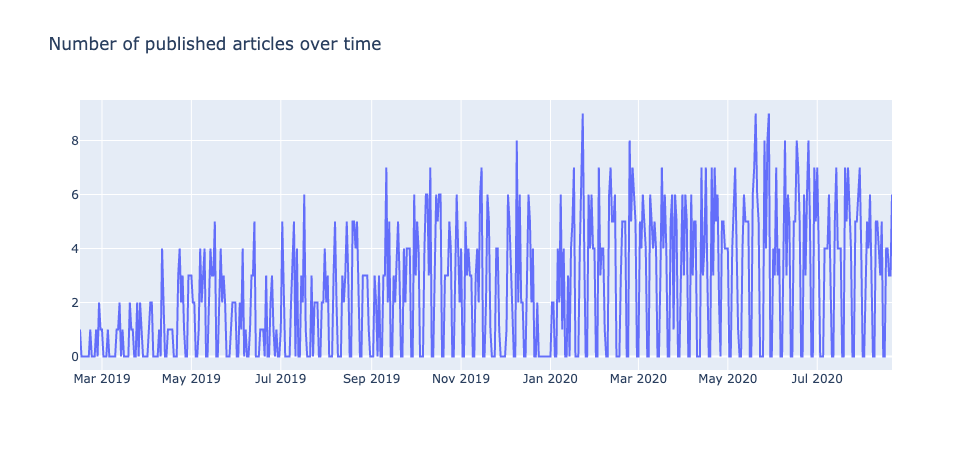

In [37]:
# build full timeline for keyword

print(dates['Dates'].max() - dates['Dates'].min())
print(len(dates_fulldf['Dates']))
dates_fulldf = pd.DataFrame(columns={'Date', 'Count'})
dates_fulldf['Dates'] = pd.date_range(dates['Dates'].min(), dates['Dates'].max())

# Set correct indices for following loop
dates_fulldf.set_index('Dates', inplace=True, drop=False)
dates.set_index('Dates', inplace=True, drop=False)
# loop over dates to build correct dataframe for display
for d in dates_fulldf.index:
    if d in dates['Dates']:
        dates_fulldf.at[d, 'Count'] = dates.at[d, 'Count']
    else:
        # set date to 0 if keyword did not occur here
        dates_fulldf.at[d, 'Count'] = 0

# drop NaTs
dates_fulldf = dates_fulldf[~pd.isnull(dates_fulldf['Dates'])]
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=dates_fulldf['Dates'],
    y=dates_fulldf['Count'],
    name="Number of published articles over time",
    connectgaps=True
    ))
fig.update_layout(
    title="Number of published articles over time",
)


In [38]:
dates_fulldf['Count'].mean()

2.4468468468468467

In [39]:
dates_fulldf['Dates'].max()

Timestamp('2020-08-21 00:00:00')

In [40]:
dates_fulldf['Dates'].min()

Timestamp('2019-02-14 00:00:00')

In [41]:
dates_fulldf['Count'].max()

9

In [42]:
dates_fulldf['Count'].min()

0

In [43]:
np.var(dates_fulldf['Count'])

5.7642918594269945

In [44]:
dates_fulldf['MovingAverage7'] = dates_fulldf['Count'].rolling(7).mean()

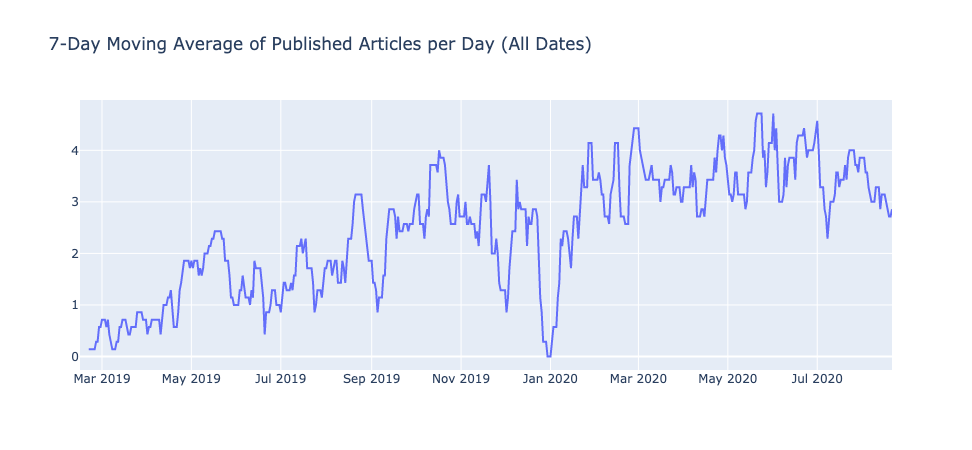

In [45]:
dat = [go.Scatter(
    x=dates_fulldf.Dates,
    y=dates_fulldf['MovingAverage7'])]

layout = dict(
    title='7-Day Moving Average of Published Articles per Day (All Dates)'
)

figure = dict(data=dat, layout=layout)
iplot(figure)

## 1.3. Authors

In [46]:
authors = daten.groupby('Author').count()

In [47]:
authors.drop(columns={'URL','Teasertext','Fulltext','Topic','DiveBrief','Date','FullTextWordTokens','FullTextLemma'}, inplace=True)
authors = authors.rename(columns={'Title': 'Count'})

In [48]:
authors.sort_values(by=['Count'], inplace=True, ascending=False)
authors['Author']= authors.index

In [49]:
daten.at[3,"URL"]

'https://www.utilitydive.com/news/pipeline-infrastructure-planning-in-the-era-of-black-lives-matter/583186/'

In [50]:
authors

Count                 Author
Author                                             
robert walton            361          robert walton
iulia gheorghiu          170        iulia gheorghiu
opinion                  161                opinion
catherine morehouse      157    catherine morehouse
kavya balaraman          116        kavya balaraman
sponsored                 53              sponsored
herman k trabish          50       herman k trabish
matthew bandyk            45         matthew bandyk
hj mai                    42                 hj mai
guy burdick               27            guy burdick
chris teale               26            chris teale
larry pearl               25            larry pearl
jason plautz              24           jason plautz
emma penrod               24            emma penrod
john funk                 22              john funk
deep dive                 13              deep dive
katie pyzyk               11            katie pyzyk
cailin crowe               9           cailin crowe
jim stinson                5            jim stinson
max witynski               5           max witynski
dan ennis                  5              dan ennis
morgan forde               4           morgan forde
kristin musulin            4        kristin musulin
lynn freehillmaye          4      lynn freehillmaye
ea crunden                 3             ea crunden
sl fuller                  3              sl fuller
samantha ann schwartz      2  samantha ann schwartz
matt leonard               2           matt leonard
cole rosengren             2         cole rosengren
jen a miller               2           jen a miller
robert freedman            1        robert freedman
qa                         1                     qa
shefali kapadia            1        shefali kapadia
alicia kelso               1           alicia kelso
kim slowey                 1             kim slowey
barry hochfelder           1       barry hochfelder
jane thier                 1             jane thier
gloria gonzalez            1        gloria gonzalez
gavin bade                 1             gavin bade
dive awards                1            dive awards
david oliver               1           david oliver
christopher doering        1    christopher doering
tom armistead              1          tom armistead

In [51]:
authors.describe()

Count
count   43.000000
mean    32.325581
std     67.545301
min      1.000000
25%      1.000000
50%      4.000000
75%     25.500000
max    361.000000

In [52]:
authors = authors[authors['Count']>10]
authors

Count               Author
Author                                         
robert walton          361        robert walton
iulia gheorghiu        170      iulia gheorghiu
opinion                161              opinion
catherine morehouse    157  catherine morehouse
kavya balaraman        116      kavya balaraman
sponsored               53            sponsored
herman k trabish        50     herman k trabish
matthew bandyk          45       matthew bandyk
hj mai                  42               hj mai
guy burdick             27          guy burdick
chris teale             26          chris teale
larry pearl             25          larry pearl
jason plautz            24         jason plautz
emma penrod             24          emma penrod
john funk               22            john funk
deep dive               13            deep dive
katie pyzyk             11          katie pyzyk

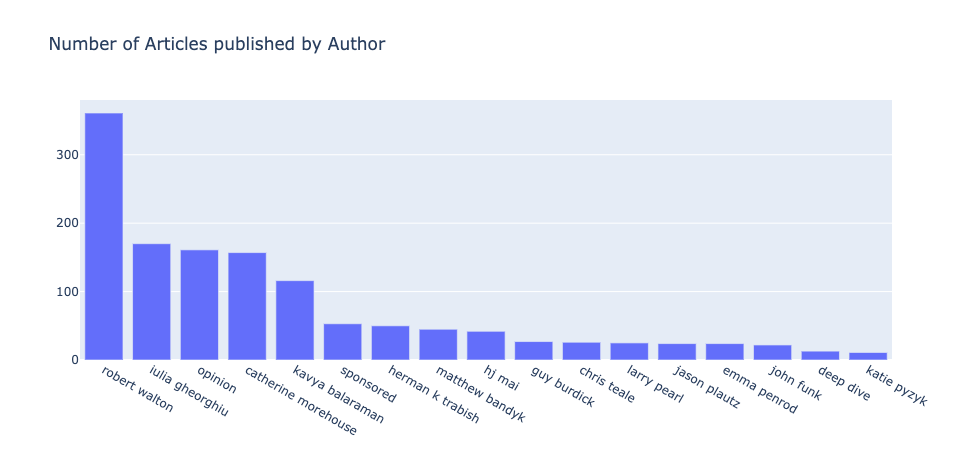

In [53]:
dat = [go.Bar(
    x=authors['Author'],
    y=authors['Count'])]
layout = dict(
    title='Number of Articles published by Author'
)
figure = dict(data=dat, layout=layout)
iplot(figure)


# 2. Keywords

In [54]:
#total = total.drop(columns={'Title'})
total = total.T.sort_values(by=0, ascending=False).T

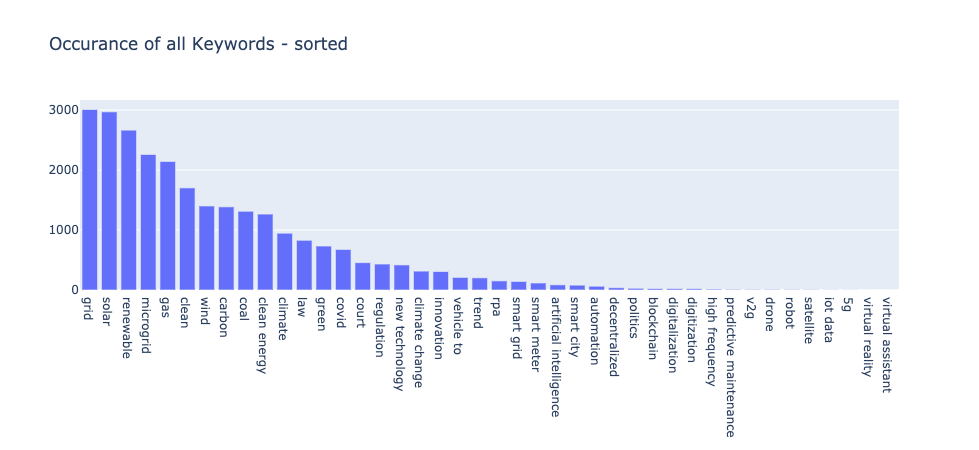

In [55]:
dat = go.Bar(
    x=total.columns,
    y= total.loc[0] 
)
layout = dict(
    title='Occurance of all Keywords - sorted'
)

figure = dict(data=dat, layout=layout)
iplot(figure)

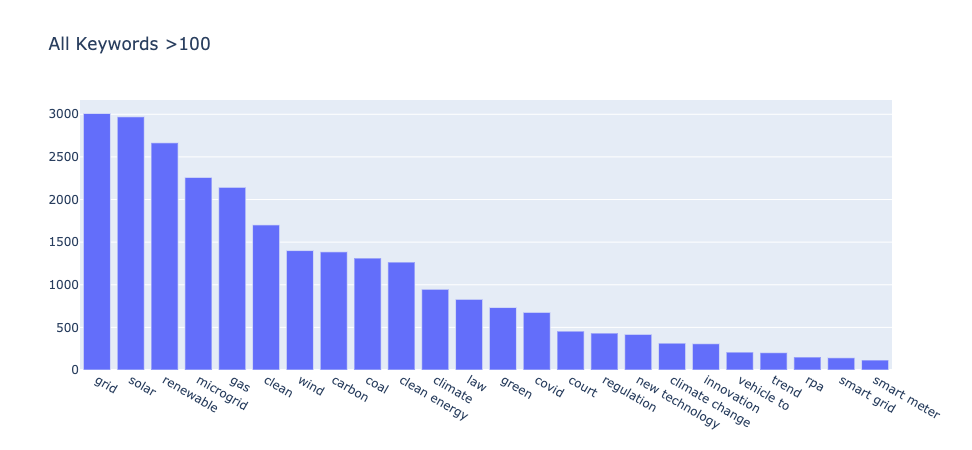

In [56]:
dat1 = go.Bar(
    x=total.T[0][total.T[0] > 100].index,
    y= total.T[0][total.T[0] > 100] 
)
layout = dict(
    title='All Keywords >100'
)

figure = dict(data=dat1, layout=layout)
iplot(figure)

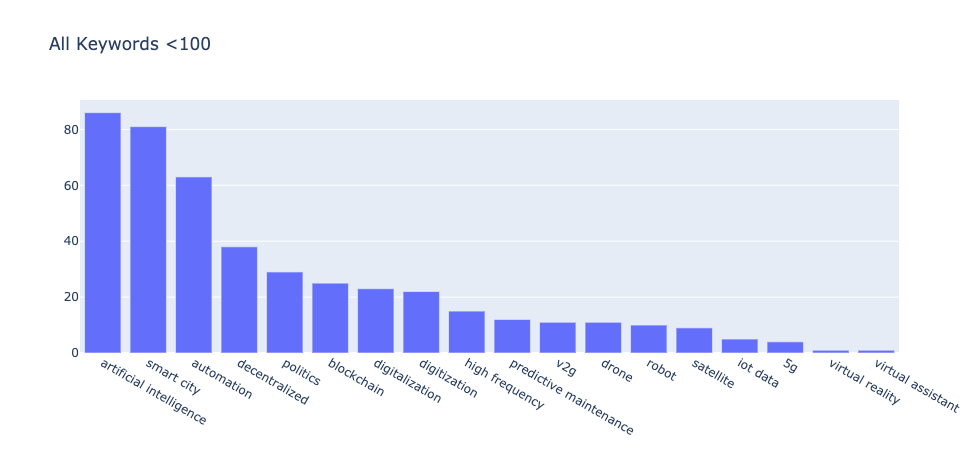

In [57]:
dat2 = go.Bar(
    x=total.T[0][total.T[0] < 100].index,
    y= total.T[0][total.T[0] < 100] 
)
layout = dict(
    title='All Keywords <100'
)

figure = dict(data=dat2, layout=layout)
iplot(figure)

In [58]:
cl = pd.DataFrame(columns=all_keywords[all_keywords['clean energy']>0].columns)

In [59]:
cl

Empty DataFrame
Columns: [FullTextLemma, Title, microgrid, grid, p2p, matchmaking, automation, rpa, robot, blockchain, dlt, innovation, trend, drone, satellite, v2g, 5g, decentralized, autarky, uhf, chatbot, callbot, carbon, clean, green, renewable, climate, coal, solar, wind, gas, covid, covid-19, digitalization, digitization, politics, law, regulation, court, smart grid, peer to peer, artificial intelligence, new technology, smart communities, smart city, predictive maintenance, vehicle to, high frequency, smart meter, edge analytics, iot data, augmented intelligence, augmented reality, virtual reality, virtual assistant, clean energy, climate change]
Index: []

[0 rows x 57 columns]

In [60]:
cl.drop(columns={'FullTextLemma','Title'},inplace=True)
for col in cl.columns:
    cl.at[0,col] = all_keywords[all_keywords['clean energy']>0][col].sum()

In [61]:
#äsum_columns, sort_keyword_frame, drop_empty_cols
cl = drop_empty_cols(cl)
cl = sort_keyword_frame(cl) 

In [62]:
dat2 = go.Bar(
    x=cl.columns,
    y= cl.loc[0]
)
layout = dict(
    title='keywords that occur with clean energy'
)

figure = dict(data=dat2, layout=layout)
iplot(figure)

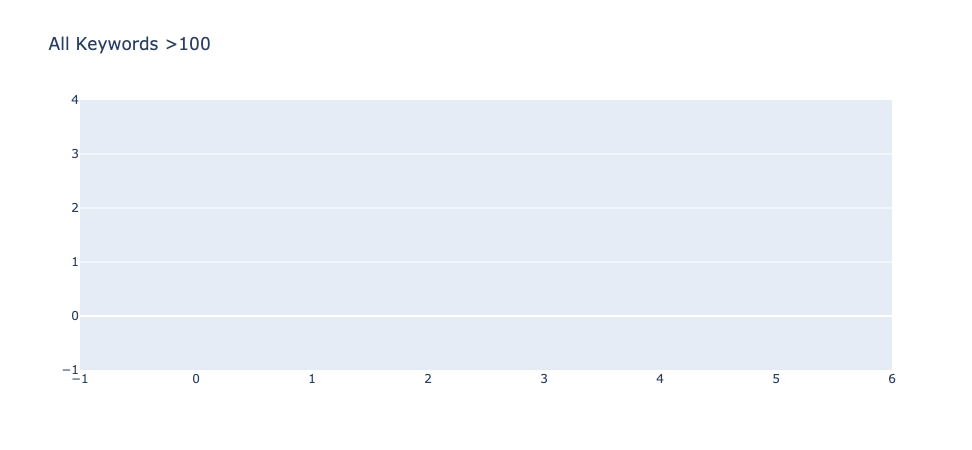

In [63]:
dat1 = go.Bar(
 
)
layout = dict(
    title='All Keywords >100'
)

figure = dict(data=dat1, layout=layout)
iplot(figure)

# Single Keywords over Time

In [64]:
import pandas as pd
dates = pd.read_csv('../data/preprocessed/10_02PreProUDText.csv',sep=',', usecols=['Date','Title'], squeeze=True)

In [65]:
dates['Date']=pd.to_datetime(dates['Date'],format='%b %d %Y')

In [66]:
all_keywords = all_keywords.merge(dates, how='left', on='Title')

In [67]:
keyword_df = all_keywords[all_keywords['covid']>0]

In [68]:
keyword_df

FullTextLemma  \
5     ['opc', 'stakeholder', 'called', 'district', '...   
9     ['u200bxcel', 'planning', 'deliver', '100', 'c...   
10    ['impact', 'novel', 'coronavirus', 'manageable...   
17    ['cyberattacks', 'pose', 'increasing', 'threat...   
18    ['electric', 'vehicle', 'market', 'still', 're...   
...                                                 ...   
1056  ['update', 'april', '2', '2020', 'story', 'upd...   
1206  ['wisconsin', 'regulator', 'opened', 'investig...   
1209  ['consumer', 'counsel', 'proposal', 'argued', ...   
1210  ['following', 'contributed', 'article', 'lisa'...   
1322  ['following', 'contributed', 'article', 'reed'...   

                                                  Title  microgrid  grid  p2p  \
5     after utility filing error dc stakeholders cal...          0     0    0   
9     xcel energy unveils plan to serve 15m evs by 2030          1     1    0   
10    ppl to exit uk market focus on growing us util...          0     2    0   
17    nypa siemens partner on new cybersecurity cent...          2     4    0   
18    utilities must prioritize customer experience ...          0     3    0   
...                                                 ...        ...   ...  ...   
1056  pge request for early recovery of 899m from cu...          0     0    0   
1206  wisconsin regulators launch investigation into...          0     0    0   
1209  ohio bans doortodoor energy sales over coronav...          0     0    0   
1210  coronavirus calls utilities to humanitarian ro...          0     0    0   
1322  as congress mulls stimulus trump should avoid ...          0     1    0   

      matchmaking  automation  rpa  robot  blockchain  ...  smart meter  \
5               0           0    0      0           0  ...            0   
9               0           0    0      0           0  ...            0   
10              0           0    0      0           0  ...            0   
17              0           0    0      0           0  ...            0   
18              0           0    0      0           0  ...            0   
...           ...         ...  ...    ...         ...  ...          ...   
1056            0           0    0      0           0  ...            0   
1206            0           0    0      0           0  ...            0   
1209            0           0    0      0           0  ...            0   
1210            0           0    0      0           0  ...            0   
1322            0           0    0      0           0  ...            0   

      edge analytics  iot data  augmented intelligence  augmented reality  \
5                  0         0                       0                  0   
9                  0         0                       0                  0   
10                 0         0                       0                  0   
17                 0         0                       0                  0   
18                 0         0                       0                  0   
...              ...       ...                     ...                ...   
1056               0         0                       0                  0   
1206               0         0                       0                  0   
1209               0         0                       0                  0   
1210               0         0                       0                  0   
1322               0         0                       0                  0   

      virtual reality  virtual assistant  clean energy  climate change  \
5                   0                  0             1               1   
9                   0                  0             2               1   
10                  0                  0             0               0   
17                  0                  0             0               0   
18                  0                  0             0               0   
...               ...                ...           ...             ...   
1056            

In [69]:
keyword_df = keyword_df.sort_values(by='Date')

In [70]:
keyword_df.Date.min()

Timestamp('2020-02-18 00:00:00')

In [71]:
dat = [go.Scatter(
    x=keyword_df.Date,
    y=keyword_df['covid'])]

layout = dict(
    title='Occurance of Keyword over Time',
)

figure = dict(data=dat, layout=layout)


In [72]:
keyword_df.Date.min()

Timestamp('2020-02-18 00:00:00')

In [73]:
fig = px.line(keyword_df, x='Date', y=keyword_df['covid'], range_x=[keyword_df.Date.min(),keyword_df.Date.max()])
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y",
    ticklabelmode="period")
fig.show()

In [74]:
# cleaner

In [75]:
keyword_df = all_keywords[all_keywords['grid']>0]

In [76]:
keyword_df = keyword_df.sort_values(by='Date')

In [77]:
maxim = keyword_df['Date'].max()

In [78]:
maxim

Timestamp('2020-08-21 00:00:00')

In [79]:
minim = keyword_df['Date'].min()

In [80]:
minim

Timestamp('2019-02-14 00:00:00')

In [81]:
date_df = pd.DataFrame(columns={'Date','Keyword'})

In [82]:
date = pd.date_range(minim, maxim)

In [83]:
keyword_df['Date'].unique

<bound method Series.unique of 1389   2019-02-14
1387   2019-02-25
1386   2019-02-27
1385   2019-02-27
1383   2019-03-01
          ...    
843           NaT
852           NaT
943           NaT
1171          NaT
1338          NaT
Name: Date, Length: 675, dtype: datetime64[ns]>

In [84]:
len(keyword_df['Date'])

675

In [85]:
pd.isnull(np.datetime64('NaT'))

True

In [86]:
keyword_df[~pd.isnull(keyword_df['Date'])]

FullTextLemma  \
1389  ['following', 'contributed', 'article', 'brad'...   
1387  ['n', 'pp1', 'margin', '00px', '00px', '00px',...   
1386  ['electric', 'grid', 'becomes', 'distributed',...   
1385  ['two', 'shift', 'transportation', 'sector', '...   
1383  ['hydrogen', 'energy', 'company', 'joi', 'scie...   
...                                                 ...   
91    ['renewable', 'energy', 'around', 'decade', 's...   
48    ['following', 'contributed', 'article', 'jonat...   
1     ['bipartisan', 'group', 'connecticut', 'lawmak...   
90    ['california', 'regulator', 'gearing', 'conduc...   
0     ['increasing', 'digitization', 'power', 'secto...   

                                                  Title  microgrid  grid  p2p  \
1389  energy transition carbon capture is clean ener...          0     2    0   
1387  how oncor is preparing for a wave of large ele...          0     2    0   
1386  new york utilities propose cybersecurity proto...          2     2    0   
1385  how new ideas of mobility will shape public ev...          5     6    0   
1383  new brunswick power florida developer partner ...          2     3    0   
...                                                 ...        ...   ...  ...   
91    propelling the transition small changes are ma...          4     5    0   
48    a pivotal moment for microgrid policy – what c...         51    49    0   
1     following outrage over hurricane isaias respon...          2     2    0   
90    california regulators plan postmortem to exami...          0     1    0   
0     propelling the transition digitization bolster...         15    19    0   

      matchmaking  automation  rpa  robot  blockchain  ...  smart meter  \
1389            0           0    0      0           0  ...            0   
1387            0           0    0      0           0  ...            0   
1386            0           0    0      0           0  ...            0   
1385            0           0    0      0           0  ...            0   
1383            0           0    0      0           0  ...            0   
...           ...         ...  ...    ...         ...  ...          ...   
91              0           0    0      0           0  ...            0   
48              0           0    0      0           0  ...            0   
1               0           0    0      0           0  ...            0   
90              0           0    0      0           0  ...            0   
0               0           6    0      0           0  ...            0   

      edge analytics  iot data  augmented intelligence  augmented reality  \
1389               0         0                       0                  0   
1387               0         0                       0                  0   
1386               0         0                       0                  0   
1385               0         0                       0                  0   
1383               0         0                       0                  0   
...              ...       ...                     ...                ...   
91                 0         0                       0                  0   
48                 0         0                       0                  0   
1                  0         0                       0                  0   
90                 0         0                       0                  0   
0                  0         0                       0                  0   

      virtual reality  virtual assistant  clean energy  climate change  \
1389                0                  0             6               3   
1387                0                  0             0               0   
1386                0                  0             0               0   
1385                0                  0             0               0   
1383                0                  0             1               1   
...               ...                ...           ...             ...   
91              

In [87]:
date_df['Date']= date

In [88]:
date_df.set_index('Date', inplace=True, drop=False)
keyword_df.set_index('Date', inplace=True, drop=False)
for d in date_df.index:
    if d in keyword_df['Date']:
        date_df.at[d,'Keyword'] = keyword_df.at[d,'grid']
    else:
        date_df.at[d,'Keyword'] = 0

In [89]:
date_df['Date']

Date
2019-02-14   2019-02-14
2019-02-15   2019-02-15
2019-02-16   2019-02-16
2019-02-17   2019-02-17
2019-02-18   2019-02-18
                ...    
2020-08-17   2020-08-17
2020-08-18   2020-08-18
2020-08-19   2020-08-19
2020-08-20   2020-08-20
2020-08-21   2020-08-21
Name: Date, Length: 555, dtype: datetime64[ns]

In [90]:
def draw_keyword_time(keyword):

    date_df= return_datetable(keyword)
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(
    x=date_df['Date'],
        y=date_df[keyword],
        name="Keyword '"+str(keyword)+"' over time",
        connectgaps=True
    ))
    fig.update_layout(
    title= "Keyword '"+str(keyword)+"' over time",
    )
    return fig

In [128]:
def return_datetable(keyword):
    key_df = all_keywords[all_keywords[keyword]>0]
    key_df = key_df.sort_values(by='Date')
    
    date_df = pd.DataFrame(columns={'Date',str(keyword)})
    #build full timeline for keyword
    date_df['Date']= pd.date_range(key_df['Date'].min(), key_df['Date'].max())
    #Set correct indices for following loop
    date_df.set_index('Date', inplace=True, drop=False)
    #key_df.set_index('Date', inplace=True, drop=False)
    key_df=key_df.groupby('Date')[str(keyword)].sum()
    key_df = pd.DataFrame(key_df)
    date_df.fillna(0, inplace=True)
    #loop over dates to build correct dataframe for display
    
    for d in date_df.index:
        if d in key_df.index:
            #size = len(list(key_df.at[str(d),str(keyword)]))
            #if size>1:
                #for counter in range(0,size):
                    # add up number of occurances of keywords for dates where multiple articles where published
                 #   date_df.at[d,str(keyword)] = date_df.at[d,str(keyword)] + key_df.at[str(d),str(keyword)][counter]
            #else:    
            date_df.at[d,str(keyword)] = key_df.at[d,str(keyword)]
        else:
            date_df.at[d,str(keyword)] = 0
    
    date_df= date_df[~pd.isnull(date_df['Date'])]
    date_df.dropna(inplace=True)
    
    return date_df

In [129]:
draw_keyword_time('regulation')

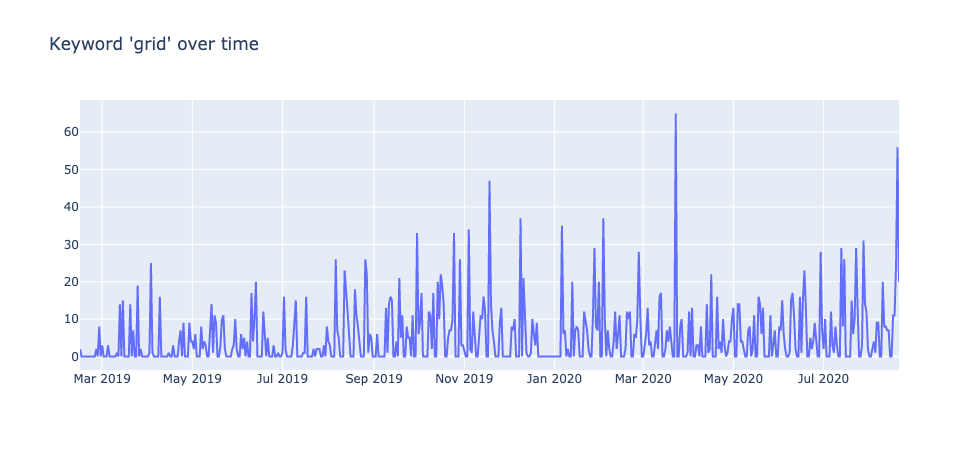

In [130]:
draw_keyword_time('grid')

In [131]:
draw_keyword_time('covid')

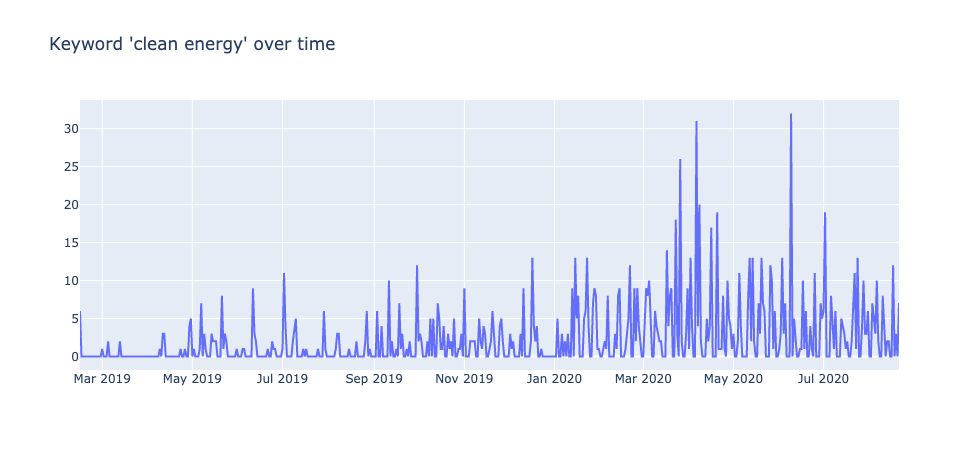

In [132]:
draw_keyword_time('clean energy')

In [133]:
draw_keyword_time('regulation')

In [301]:
def calculate_korrelation(key1, key2):
    date1 = return_datetable(key1)
    date2 = return_datetable(key2)
    # Get min date and restrict both dfs to min date to be able to compare apples with apples (data over same time)
    
    # reverse logic due to timestamp as ms
    if date1['Date'].min() < date2['Date'].min():
        minimum = date2['Date'].min()
    else:
        minimum = date1['Date'].min()
    
    date1 = date1[date1['Date']>minimum]
    date2 = date2[date2['Date']>minimum]
    
    # Check that both keywords have same ending date
    if date1['Date'].max() > date2['Date'].max():
        maxim = date2['Date'].max()
    else:
        maxim = date1['Date'].max()
    
    date1 = date1[date1['Date']<maxim]
    date2 = date2[date2['Date']<maxim]
    
 
    #calculate korrelation -> Here we could also use Spearmansrho, Kendallstau or Pearsonsr -> but use good old correlationcoeff
    try:
        if date1.shape[0]>0 and date2.shape[0]>0:
            korr = np.corrcoef(date1[str(key1)], date2[str(key2)])
            
        else: 
            if key1 == key2:
                korr = np.array([[1, 1],[1, 1]])
            else:
                korr = np.corrcoef([np.NaN,np.NaN],[np.NaN,np.NaN])
    except:
        print("Minimum: "+str(minimum))
        print(date1)
        print(date2)
        korr = np.array([[np.NaN, np.NaN],[np.NaN, np.NaN]])
    return korr
    

In [302]:
korr = calculate_korrelation("covid", "wind")

In [303]:
korr[0,1]

0.15400743996032215

In [304]:
korr

array([[1.        , 0.15400744],
       [0.15400744, 1.        ]])

In [305]:
total.shape[0]

1

In [306]:
total100 = total.T[total.T[0]>100].T

In [307]:
total100

grid   solar  renewable  microgrid     gas   clean    wind  carbon  \
0  3009.0  2970.0     2665.0     2259.0  2143.0  1702.0  1401.0  1386.0   

     coal  clean energy  ...  court  regulation  new technology  \
0  1313.0        1266.0  ...  456.0       433.0           418.0   

   climate change  innovation  vehicle to  trend    rpa  smart grid  \
0           315.0       308.0       210.0  203.0  152.0       143.0   

   smart meter  
0        117.0  

[1 rows x 24 columns]

In [308]:
# Building Korrelation DF
korr_matrix = pd.DataFrame(columns = total.columns, index =total.columns)

In [ ]:
for key1 in korr_matrix.index:
    for key2 in korr_matrix.columns:
        #Ugly but works around np.int64 issue -> numpy.int64' object is not iterable -> decided to postpone
        #try:
            korr = calculate_korrelation(key1,key2)
            korr_matrix.at[key1,key2] = korr[0,1]
            korr_matrix.at[key2,key1] = korr[1,0]
            if key1 == key2:
                korr_matrix.at[key1,key1] = korr[0,0]
                korr_matrix.at[key2,key2] = korr[1,1]
        #except Exception:
         #   print()
         #   pass
        

In [310]:
korr_matrix

grid       solar   renewable   microgrid  \
grid                              1     0.33925    0.421927    0.892427   
solar                       0.33925           1    0.445861    0.279965   
renewable                  0.421927    0.445861           1    0.339546   
microgrid                  0.892427    0.279965    0.339546           1   
gas                        0.270903    0.258595    0.516078    0.179453   
clean                      0.363448    0.378836    0.590649    0.287434   
wind                       0.355099    0.396738    0.545512    0.278289   
carbon                     0.282262    0.227867    0.480643    0.199043   
coal                       0.236579    0.278844    0.476908    0.175782   
clean energy               0.360432    0.387346    0.585368    0.302238   
climate                    0.209412    0.240188    0.349427    0.168093   
law                         0.20115    0.266343     0.44424     0.12068   
green                      0.171713    0.228389     0.35629    0.172599   
covid                      0.190596    0.203806    0.288121    0.163886   
court                      0.121964    0.160773    0.209347    0.104484   
regulation                 0.267159    0.198798    0.321805    0.144027   
new technology             0.341478    0.307775    0.407449     0.26168   
climate change             0.173006    0.198837    0.277233    0.142527   
innovation                 0.318298     0.30789    0.320404    0.272387   
vehicle to                 0.236155    0.153118    0.252563    0.167779   
trend                      0.328213    0.153209    0.364974    0.256944   
rpa                        0.096689    0.138297    0.314273   0.0649747   
smart grid                 0.268836   0.0924983    0.215959    0.260995   
smart meter                0.141189    0.100135    0.134744    0.102026   
artificial intelligence   0.0774789  0.00459605   0.0211409   0.0695252   
smart city                0.0897411    0.106614     0.11312   0.0469454   
automation                 0.140909   0.0760745    0.099799    0.109885   
decentralized              0.093967   0.0319445   0.0802069   0.0629257   
politics                 0.00519853     0.14163   0.0844785  0.00133406   
blockchain                0.0668195  0.00430286   0.0729953   0.0620341   
digitalization             0.107155 -0.00237872   0.0127456   0.0585959   
digitization               0.167881    0.030343   0.0775902   0.0580158   
high frequency            0.0827153    0.022032   0.0886862   0.0583829   
predictive maintenance    0.0999662   0.0118071   0.0547767    0.054289   
v2g                       0.0611148  0.00387655  -0.0234386   0.0429271   
drone                     0.0409266  -0.0421409  -0.0303128   0.0643125   
robot                     0.0308731    0.033293   0.0598726  0.00471454   
satellite                 0.0782663    0.247354   0.0647909   0.0460235   
iot data                        NaN         NaN         NaN         NaN   
5g                        0.0155158   0.0439175  0.00834184   0.0152665   
virtual reality                 NaN         NaN         NaN         NaN   
virtual assistant               NaN         NaN         NaN         NaN   

                                gas       clean        wind      carbon  \
grid                       0.270903    0.363448    0.355099    0.282262   
solar                      0.258595    0.378836    0.396738    0.227867   
renewable                  0.516078    0.590649    0.545512    0.480643   
microgrid                  0.179453    0.287434    0.278289    0.199043   
gas                               1    0.555917     0.33292    0.569641   
clean                      0.555917           1    0.430063    0.547643   
wind                        0.33292    0.430063           1    0.336517   
carbon                     0.569641    0.547643    0.336517           1   
coal                       0.507168    0.453149    0.268904     0.44594   
clean energy               0.524897    0.943769    0.41

In [331]:
korr_matrix.to_csv('../data/preprocessed/correlation.csv')

In [311]:
for col in korr_matrix.columns:
    korr_matrix[col] = korr_matrix[col].apply(lambda x: pd.to_numeric(x))

In [312]:
corr_max = korr_matrix.nlargest(4, ['grid'])

In [313]:
corr_data = pd.DataFrame()

In [314]:
def get_max_correlated_keywords(keyword):
    corr_max = korr_matrix.nlargest(5, [str(keyword)])
    #print(corr_max)
    return corr_max[str(keyword)]

In [315]:
def get_top_fullmatrix(keyword):
    corr_max = korr_matrix.nlargest(5, [str(keyword)])
    return corr_max

In [316]:
get_top_fullmatrix('grid')

grid     solar  renewable  microgrid       gas     clean  \
grid          1.000000  0.339250   0.421927   0.892427  0.270903  0.363448   
microgrid     0.892427  0.279965   0.339546   1.000000  0.179453  0.287434   
renewable     0.421927  0.445861   1.000000   0.339546  0.516078  0.590649   
clean         0.363448  0.378836   0.590649   0.287434  0.555917  1.000000   
clean energy  0.360432  0.387346   0.585368   0.302238  0.524897  0.943769   

                  wind    carbon      coal  clean energy  ...  high frequency  \
grid          0.355099  0.282262  0.236579      0.360432  ...        0.082715   
microgrid     0.278289  0.199043  0.175782      0.302238  ...        0.058383   
renewable     0.545512  0.480643  0.476908      0.585368  ...        0.088686   
clean         0.430063  0.547643  0.453149      0.943769  ...        0.066802   
clean energy  0.414795  0.497741  0.407738      1.000000  ...        0.061558   

              predictive maintenance       v2g     drone     robot  satellite  \
grid                        0.099966  0.061115  0.040927  0.030873   0.078266   
microgrid                   0.054289  0.042927  0.064312  0.004715   0.046023   
renewable                   0.054777 -0.023439 -0.030313  0.059873   0.064791   
clean                       0.015246  0.015065 -0.012753  0.039196   0.002513   
clean energy                0.025023 -0.041902 -0.016686  0.059835   0.013227   

              iot data        5g  virtual reality  virtual assistant  
grid               NaN  0.015516              NaN                NaN  
microgrid          NaN  0.015267              NaN                NaN  
renewable          NaN  0.008342              NaN                NaN  
clean              NaN -0.001651              NaN                NaN  
clean energy       NaN -0.005080              NaN                NaN  

[5 rows x 42 columns]

In [317]:
get_max_correlated_keywords('grid')

grid            1.000000
microgrid       0.892427
renewable       0.421927
clean           0.363448
clean energy    0.360432
Name: grid, dtype: float64

In [318]:
get_max_correlated_keywords('clean energy')

clean energy    1.000000
clean           0.943769
renewable       0.585368
climate         0.534245
gas             0.524897
Name: clean energy, dtype: float64

In [319]:
get_max_correlated_keywords('regulation')

regulation    1.000000
law           0.430136
coal          0.372514
renewable     0.321805
politics      0.295214
Name: regulation, dtype: float64

In [320]:
get_max_correlated_keywords('new technology')

new technology    1.000000
innovation        0.465697
renewable         0.407449
grid              0.341478
carbon            0.339981
Name: new technology, dtype: float64

In [321]:
get_max_correlated_keywords('smart grid')

smart grid        1.000000
grid              0.268836
microgrid         0.260995
renewable         0.215959
digitalization    0.194623
Name: smart grid, dtype: float64

In [322]:
get_max_correlated_keywords('climate change')

climate change    1.000000
climate           0.873980
carbon            0.524655
clean             0.425440
clean energy      0.397640
Name: climate change, dtype: float64

In [323]:
get_max_correlated_keywords('trend')

trend          1.000000
gas            0.387108
smart meter    0.373787
renewable      0.364974
grid           0.328213
Name: trend, dtype: float64

In [324]:
get_max_correlated_keywords('digitalization')

digitalization    1.000000
smart grid        0.194623
5g                0.164761
digitization      0.130662
new technology    0.122274
Name: digitalization, dtype: float64

In [326]:
get_max_correlated_keywords('automation')

automation                1.000000
predictive maintenance    0.314572
robot                     0.233372
high frequency            0.190592
new technology            0.186302
Name: automation, dtype: float64

In [327]:
get_max_correlated_keywords('politics')

politics        1.000000
regulation      0.295214
court           0.247237
clean energy    0.204201
law             0.203807
Name: politics, dtype: float64

In [332]:
corr= get_max_correlated_keywords('artificial intelligence')

In [339]:
corr

artificial intelligence    1.000000
predictive maintenance     0.727375
drone                      0.307723
robot                      0.167718
automation                 0.158422
Name: artificial intelligence, dtype: float64

In [338]:
corr[0]

1.0

In [340]:
corr.index

Index(['artificial intelligence', 'predictive maintenance', 'drone', 'robot',
       'automation'],
      dtype='object')

In [325]:
korr_matrix.columns

Index(['grid', 'solar', 'renewable', 'microgrid', 'gas', 'clean', 'wind',
       'carbon', 'coal', 'clean energy', 'climate', 'law', 'green', 'covid',
       'court', 'regulation', 'new technology', 'climate change', 'innovation',
       'vehicle to', 'trend', 'rpa', 'smart grid', 'smart meter',
       'artificial intelligence', 'smart city', 'automation', 'decentralized',
       'politics', 'blockchain', 'digitalization', 'digitization',
       'high frequency', 'predictive maintenance', 'v2g', 'drone', 'robot',
       'satellite', 'iot data', '5g', 'virtual reality', 'virtual assistant'],
      dtype='object')